In [474]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error



In [475]:
baseDeDonnees =  pd.read_csv("Donnés\weatherstats_montreal_daily (3).csv", index_col = "date")
del baseDeDonnees["sunset_hhmm"]
del baseDeDonnees["sunrise_hhmm"]
baseDeDonnees


C:\Users\test8\AppData\Local\Temp\ipykernel_11228\2377027068.py:1: DtypeWarning: Columns (46,49) have mixed types. Specify dtype option on import or set low_memory=False.
  baseDeDonnees =  pd.read_csv("Donnés\weatherstats_montreal_daily (3).csv", index_col = "date")


,max_temperature,avg_hourly_temperature,avg_temperature,min_temperature,max_humidex,min_windchill,max_relative_humidity,avg_hourly_relative_humidity,avg_relative_humidity,min_relative_humidity,...,avg_cloud_cover_4,min_cloud_cover_4,max_cloud_cover_8,avg_hourly_cloud_cover_8,avg_cloud_cover_8,min_cloud_cover_8,max_cloud_cover_10,avg_hourly_cloud_cover_10,avg_cloud_cover_10,min_cloud_cover_10
date,,,,,,,,,,,,,,,,,,,,,
2025-03-09,2.5,-1.95,-2.40,-7.3,NaN,-13.0,90,65.8,68.0,46,...,NaN,NaN,8.0,5.9,4.5,1.0,NaN,NaN,NaN,NaN
2025-03-08,-1.6,-4.54,-4.34,-7.1,NaN,-17.0,64,52.7,54.0,44,...,NaN,NaN,8.0,4.5,4.0,0.0,NaN,NaN,NaN,NaN
2025-03-07,0.8,-4.16,-3.60,-8.0,NaN,-18.0,80,60.0,62.5,45,...,NaN,NaN,8.0,4.6,4.5,1.0,NaN,NaN,NaN,NaN
2025-03-06,6.8,2.28,-0.14,-7.1,NaN,-16.0,95,82.8,80.5,66,...,NaN,NaN,8.0,7.7,7.0,6.0,NaN,NaN,NaN,NaN
2025-03-05,8.7,3.33,4.64,0.6,NaN,NaN,97,90.7,91.5,86,...,NaN,NaN,8.0,8.0,8.0,8.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970-01-10,-11.7,-13.51,-13.64,-15.6,NaN,-26.0,76,65.9,65.0,54,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-09,-11.7,-14.01,-15.00,-18.3,NaN,-26.0,79,71.2,72.0,65,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-08,-10.6,-13.86,-15.00,-19.4,NaN,-22.0,79,74.8,72.0,65,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [476]:
#Verifier quel donné sont trop peu.
null_prc = baseDeDonnees.apply(pd.isnull).sum()/baseDeDonnees.shape[0]
null_prc


max_temperature              0.000000
avg_hourly_temperature       0.000000
avg_temperature              0.000000
min_temperature              0.000000
max_humidex                  0.747370
                               ...   
min_cloud_cover_8            0.793073
max_cloud_cover_10           0.994145
avg_hourly_cloud_cover_10    0.994145
avg_cloud_cover_10           0.994145
min_cloud_cover_10           0.994145
Length: 69, dtype: float64

In [477]:
colonne_valide = baseDeDonnees.columns[null_prc < 0.05]
colonne_valide.shape[0]

36

In [478]:
baseDeDonnees = baseDeDonnees[colonne_valide].copy()
baseDeDonnees.dtypes

max_temperature                 float64
avg_hourly_temperature          float64
avg_temperature                 float64
min_temperature                 float64
max_relative_humidity             int64
avg_hourly_relative_humidity    float64
avg_relative_humidity           float64
min_relative_humidity             int64
max_dew_point                   float64
avg_hourly_dew_point            float64
avg_dew_point                   float64
min_dew_point                   float64
max_wind_speed                    int64
avg_hourly_wind_speed           float64
avg_wind_speed                  float64
min_wind_speed                    int64
max_pressure_sea                float64
avg_hourly_pressure_sea         float64
avg_pressure_sea                float64
min_pressure_sea                float64
max_pressure_station            float64
avg_hourly_pressure_station     float64
avg_pressure_station            float64
min_pressure_station            float64
max_visibility                    int64


In [479]:
baseDeDonnees.columns = baseDeDonnees.columns.str.lower()
#Remplir les trous dans la base de donné par avec la valeurs avant.
baseDeDonnees = baseDeDonnees.ffill()
#Verification qu'il ne manque plus de manque de donnés.
null_prc = baseDeDonnees.apply(pd.isnull).sum()/baseDeDonnees.shape[0]
null_prc



max_temperature                 0.0
avg_hourly_temperature          0.0
avg_temperature                 0.0
min_temperature                 0.0
max_relative_humidity           0.0
avg_hourly_relative_humidity    0.0
avg_relative_humidity           0.0
min_relative_humidity           0.0
max_dew_point                   0.0
avg_hourly_dew_point            0.0
avg_dew_point                   0.0
min_dew_point                   0.0
max_wind_speed                  0.0
avg_hourly_wind_speed           0.0
avg_wind_speed                  0.0
min_wind_speed                  0.0
max_pressure_sea                0.0
avg_hourly_pressure_sea         0.0
avg_pressure_sea                0.0
min_pressure_sea                0.0
max_pressure_station            0.0
avg_hourly_pressure_station     0.0
avg_pressure_station            0.0
min_pressure_station            0.0
max_visibility                  0.0
avg_hourly_visibility           0.0
avg_visibility                  0.0
min_visibility              

In [480]:
#Rendre en minuscule les titres
baseDeDonnees.columns = baseDeDonnees.columns.str.lower()

<Axes: xlabel='date'>

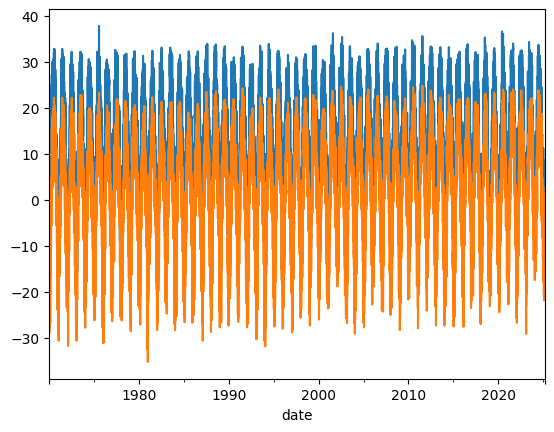

In [481]:
baseDeDonnees.index = pd.to_datetime(baseDeDonnees.index)
baseDeDonnees.index.year.value_counts().sort_index()
baseDeDonnees["max_temperature"].plot()
baseDeDonnees["min_temperature"].plot()


In [482]:
#Inverser les dates.
baseDeDonnees = baseDeDonnees.iloc[::-1]
#Choix de se qu'on veut produire.(Ici temperature maximum)
baseDeDonnees["target"] = baseDeDonnees.shift(-1)["max_temperature"]

baseDeDonnees = baseDeDonnees.ffill()


In [483]:
#Configuration du model
model_rr = Ridge(alpha=0.1)
predicteur = baseDeDonnees.columns[~baseDeDonnees.columns.isin(["target","date"])]
predicteur


Index(['max_temperature', 'avg_hourly_temperature', 'avg_temperature',
       'min_temperature', 'max_relative_humidity',
       'avg_hourly_relative_humidity', 'avg_relative_humidity',
       'min_relative_humidity', 'max_dew_point', 'avg_hourly_dew_point',
       'avg_dew_point', 'min_dew_point', 'max_wind_speed',
       'avg_hourly_wind_speed', 'avg_wind_speed', 'min_wind_speed',
       'max_pressure_sea', 'avg_hourly_pressure_sea', 'avg_pressure_sea',
       'min_pressure_sea', 'max_pressure_station',
       'avg_hourly_pressure_station', 'avg_pressure_station',
       'min_pressure_station', 'max_visibility', 'avg_hourly_visibility',
       'avg_visibility', 'min_visibility', 'heatdegdays', 'cooldegdays',
       'growdegdays_5', 'growdegdays_7', 'growdegdays_10', 'precipitation',
       'rain', 'snow'],
      dtype='object')

In [484]:
def backtest(baseDeDonnees,model,predicteur,start =3650 ,step=90):
    all_predictions = []
    for i in range(start,baseDeDonnees.shape[0],step):
        train = baseDeDonnees.iloc[:i,:]
        test = baseDeDonnees.iloc[i:i+step,:]

        model.fit(train[predicteur],train["target"])
        preds = model.predict(test[predicteur])
        preds = pd.Series(preds,index =test.index)
        combined = pd.concat([test["target"],preds],axis=1)
        combined.columns = ["Vrais valeur","Valeur predite"]
        combined["difference"] = (combined["Valeur predite"] - combined["Vrais valeur"]).abs()
        all_predictions.append(combined)
    return pd.concat(all_predictions)

In [485]:
predictions = backtest(baseDeDonnees,model_rr,predicteur)

In [486]:
#Creer la valeur d'erreur pour la voir diminuer.(En Gros en calcul la moyenne de la difference.
mean_absolute_error(predictions["Vrais valeur"],predictions["Valeur predite"])


2.8666847868483405

In [487]:
def prc_diff(ancienne,nouvelle):
    return (nouvelle - ancienne) /ancienne
def computer_rolling(baseDeDonnees,horizon,col):
    label = f"rolling_{horizon}_{col}"

    baseDeDonnees[label] = baseDeDonnees[col].rolling(horizon).mean()
    baseDeDonnees[f"{label}_pct"] = prc_diff(baseDeDonnees[label],baseDeDonnees[col])
    return baseDeDonnees
rolling_horizon = [3, 14]

for horizon in  rolling_horizon:
    for col in ["max_temperature","min_temperature","precipitation","rain","snow"]:
        baseDeDonnees = computer_rolling(baseDeDonnees,horizon,col)

#Enlever les valeurs NaN generer parce que les il n'y as de donnes les 14 derniers jours.
baseDeDonnees = baseDeDonnees.iloc[14:,:]
baseDeDonnees

,max_temperature,avg_hourly_temperature,avg_temperature,min_temperature,max_relative_humidity,avg_hourly_relative_humidity,avg_relative_humidity,min_relative_humidity,max_dew_point,avg_hourly_dew_point,...,rolling_14_max_temperature,rolling_14_max_temperature_pct,rolling_14_min_temperature,rolling_14_min_temperature_pct,rolling_14_precipitation,rolling_14_precipitation_pct,rolling_14_rain,rolling_14_rain_pct,rolling_14_snow,rolling_14_snow_pct
date,,,,,,,,,,,,,,,,,,,,,
1970-01-20,-18.9,-22.20,-23.90,-28.9,69,61.6,61.5,54,-24.4,-27.6,...,-13.021429,0.451454,-22.128571,0.306004,0.557143,-1.000000,0.000000,NaN,0.750000,-1.000000
1970-01-21,-18.9,-21.50,-22.79,-26.7,68,56.3,57.0,46,-23.9,-27.9,...,-13.778571,0.371695,-22.371429,0.193487,0.578571,-0.481481,0.000000,NaN,0.771429,-0.611111
1970-01-22,-18.3,-22.12,-22.20,-26.1,68,55.5,59.0,50,-23.9,-28.6,...,-14.328571,0.277168,-22.850000,0.142232,0.521429,-1.000000,0.000000,NaN,0.700000,-1.000000
1970-01-23,-11.1,-15.17,-16.64,-22.2,83,72.8,72.5,62,-13.3,-18.9,...,-14.285714,-0.223000,-23.128571,-0.040148,0.521429,0.917808,0.000000,NaN,0.935714,3.916031
1970-01-24,-12.2,-20.04,-20.00,-27.8,72,65.6,64.5,57,-17.2,-24.8,...,-14.321429,-0.148130,-24.000000,0.158333,0.500000,-1.000000,0.000000,NaN,0.900000,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-05,8.7,3.33,4.64,0.6,97,90.7,91.5,86,6.5,1.9,...,-0.235714,-37.909091,-10.000000,-1.060000,1.942857,2.397059,0.757143,7.716981,1.071429,-1.000000
2025-03-06,6.8,2.28,-0.14,-7.1,95,82.8,80.5,66,5.2,-0.4,...,0.750000,8.066667,-9.164286,-0.225253,1.985714,-0.294964,0.814286,-0.017544,1.057143,-0.432432
2025-03-07,0.8,-4.16,-3.60,-8.0,80,60.0,62.5,45,-8.8,-11.0,...,1.350000,-0.407407,-8.864286,-0.097502,1.985714,-1.000000,0.814286,-1.000000,1.057143,-1.000000


In [488]:
def expend_mean(baseDeDonnees):
    return baseDeDonnees.expanding(1).mean()
for col in ["max_temperature","min_temperature","precipitation","rain","snow"]:
    baseDeDonnees[f"month_avg_{col}"] = baseDeDonnees[col].groupby(baseDeDonnees.index.month,group_keys = False).apply(expend_mean)
    baseDeDonnees[f"day_year_avg_{col}"] = baseDeDonnees[col].groupby(baseDeDonnees.index.day_of_year,group_keys = False).apply(expend_mean)

In [489]:
#Creation a nouveau de notre predicteur avec les nouvelles colonnes creer au dessus.
predicteur = baseDeDonnees.columns[~baseDeDonnees.columns.isin(["target","date"])]
#Transforme nos valeur inf et -inf par NaN pour pouvoir les gerer.
baseDeDonnees.replace([np.inf, -np.inf], np.nan, inplace=True)
#Remplacer nos valeur NaN par 0 pour ne pas avoir de manque de donnes.
baseDeDonnees = baseDeDonnees.fillna(0)


In [490]:
predictions = backtest(baseDeDonnees,model_rr,predicteur)


C:\Users\test8\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=3.84566e-35): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\test8\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=3.84369e-35): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\test8\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=3.85051e-35): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\test8\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=4.45057e-35): result may not be accurate.
  return linalg.solve

In [491]:
#Voir le taux d'erreur pour comparer avec le taux d'erreur d'avant que nous avons calculer au dessus.
mean_absolute_error(predictions["Vrais valeur"],predictions["Valeur predite"])


2.726266459824733

In [492]:
#Permet de voir les jours qui on une enorme difference dans nos predictions pour savoir futurement pourquoi et essayer de regler cela.
predictions.sort_values("difference", ascending=False)

,Vrais valeur,Valeur predite,difference
date,,,
1990-11-27,19.2,1.464780,17.735220
1994-01-27,8.1,-7.715547,15.815547
1997-02-17,8.2,-6.896614,15.096614
1998-01-01,5.3,-9.779547,15.079547
2014-04-13,24.5,9.953979,14.546021
...,...,...,...
2005-01-07,-1.2,-1.198152,0.001848
1992-05-21,28.0,27.998243,0.001757
1995-01-03,-4.2,-4.201263,0.001263


In [493]:

last_known_values = baseDeDonnees.iloc[-1][predicteur].values.reshape(1, -1)
predicted_value = model_rr.predict(last_known_values)[0]

# Créer un dictionnaire pour la nouvelle ligne de données
new_day = {
    "target": predicted_value,  # Remplir la cible avec la prédiction
}

# Pour les autres colonnes, ajouter NaN
for col in baseDeDonnees.columns:
    if col != "target":
        new_day[col] = np.nan

# Créer un DataFrame avec la nouvelle journée, en prenant comme date la suivante dans l'index
new_index = baseDeDonnees.index[-1] + pd.Timedelta(days=1)
new_day_df = pd.DataFrame(new_day, index=[new_index])

# Ajouter cette nouvelle ligne à la base de données
baseDeDonnees = pd.concat([baseDeDonnees, new_day_df])

# Vérifier le résultat
baseDeDonnees.tail()



C:\Users\test8\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


,max_temperature,avg_hourly_temperature,avg_temperature,min_temperature,max_relative_humidity,avg_hourly_relative_humidity,avg_relative_humidity,min_relative_humidity,max_dew_point,avg_hourly_dew_point,...,month_avg_max_temperature,day_year_avg_max_temperature,month_avg_min_temperature,day_year_avg_min_temperature,month_avg_precipitation,day_year_avg_precipitation,month_avg_rain,day_year_avg_rain,month_avg_snow,day_year_avg_snow
2025-03-06,6.8,2.28,-0.14,-7.1,95.0,82.8,80.5,66.0,5.2,-0.4,...,2.472531,0.030357,-6.391233,-8.889286,2.397019,3.380357,1.194974,1.291071,1.109702,1.908929
2025-03-07,0.8,-4.16,-3.60,-8.0,80.0,60.0,62.5,45.0,-8.8,-11.0,...,2.471554,0.417857,-6.392173,-8.366071,2.395619,1.792857,1.194276,0.530357,1.109054,1.303571
2025-03-08,-1.6,-4.54,-4.34,-7.1,64.0,52.7,54.0,44.0,-11.2,-12.9,...,2.469177,0.783929,-6.392586,-8.216071,2.394221,1.862500,1.193579,0.732143,1.108406,1.112500
2025-03-09,2.5,-1.95,-2.40,-7.3,90.0,65.8,68.0,46.0,-4.8,-7.7,...,2.469195,0.387500,-6.393116,-8.223214,2.394224,2.626786,1.192882,1.066071,1.109160,1.307143
2025-03-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
